#Import the relevant Python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

#Read the Loan dataset

In [2]:
df = pd.read_csv('/content/sample_data/loan.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Verify that all the rows an columns are uploaded as in the csv file.
df.shape

(39717, 111)

#Data Cleaning

###Delete columns having only null (NA) values

In [4]:
# Check how many columns have all null(NA) values
null_cols = df.columns[df.isna().all()]
null_cols.size # Result 54

# Drop all the columns that have only null(NA) values and replace the dataframe.
df.drop(null_cols, axis=1, inplace=True)
df.shape # Result (39717, 57) -- (111-54 = 57)

(39717, 57)

###The Customer variables do not affect the analysis of the defaulters and non-defaulters since they will not be available at the time of loan application. Hence some of these variables can be removed from the dataset.

In [5]:
customer_behavior_cols = df[['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']]
df.drop(customer_behavior_cols, axis=1, inplace=True)
df.shape # Result (39717, 42)

(39717, 42)

In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'next_pymnt_d',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

###Clean the emp_length column to remove the strings and null values

In [7]:
# Rename < 1 year to 0 (zero) years
# Rename 10+ years to 10 years
df['emp_length'] = df.emp_length.str.replace('< 1','0')
df['emp_length'] = df.emp_length.str.replace('+','')

df['emp_length'] = df.emp_length.str.replace('years','')
df['emp_length'] = df.emp_length.str.replace('year','')
df['emp_length'] = df.emp_length.str.replace(' ','')


# Remove the null values and repopulate teh data frame.
df = df[~(df.emp_length.isna())]

# Convert the dtype of the column to int
df['emp_length'] = df.emp_length.astype(int)

#Verify that the values have changed and are appropriate.
df.emp_length.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

###Clean the term column to remove the text and make it numeric for analysis.

In [8]:
df.term.value_counts(dropna=False)

 36 months    28287
 60 months    10355
Name: term, dtype: int64

In [9]:
df['term'] = df.term.str.replace(' months','').astype(int)

###Remove the "Current" ongoing loans from the analysis since they do not clearly indicate if an applicant can default or not.

In [10]:
df = df[~(df['loan_status']=='Current')]
df.shape # (37544, 42)

(37544, 42)

###Check for outliers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text major ticklabel objects>)

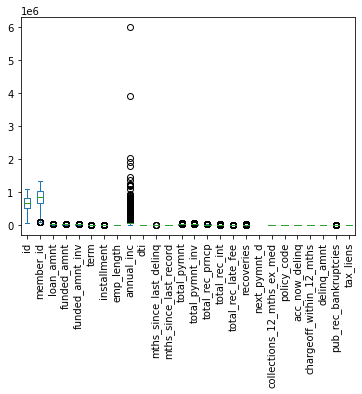

In [11]:
# Create the boxplot
df.plot.box()
plt.xticks(rotation='vertical')

In [12]:
df.annual_inc.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
10%      3.000000e+04
20%      3.800000e+04
30%      4.500000e+04
40%      5.100000e+04
50%      6.000000e+04
60%      6.600000e+04
70%      7.600000e+04
80%      9.000000e+04
90%      1.166724e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [13]:
# The outliers are <10% and >80%. Check the nummber of rows constituting these values.
df[df.annual_inc < 30000].shape #(3409, 42)

(3409, 42)

In [14]:
df[df.annual_inc > 90000].shape #(7421, 42)

(7421, 42)

In [15]:
# Remove the outliers.
df = df[~(df.annual_inc < 30000)]
df = df[~(df.annual_inc > 90000)]
df.shape # (26714, 42)

(26714, 42)

#Data Analysis

###Univariate Analysis of variables

Text(0.5, 6.79999999999999, 'Employment length (in years)')

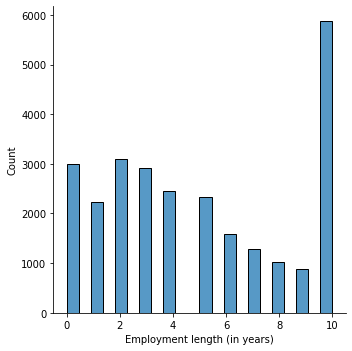

In [16]:
#Create a distribution plot for loan_status
sbn.displot(df.emp_length)
plt.xlabel('Employment length (in years)')

# The result indicates that there are maximum number of employees with duration of more than 8 years.

###Bivariate Analysis of variables

loan_status  Charged Off  Fully Paid
emp_length                          
0                    415        2582
1                    331        1908
2                    415        2674
3                    412        2506
4                    351        2103
5                    332        2008
6                    229        1359
7                    204        1088
8                    145         881
9                    125         767
10                  1011        4868


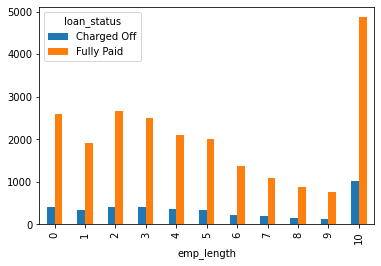

In [17]:
CrosstabResult=pd.crosstab(index=df['emp_length'],columns=df['loan_status'])
print(CrosstabResult)
CrosstabResult.plot.bar()

# The Charge-off trend is more with employees with more number of years.

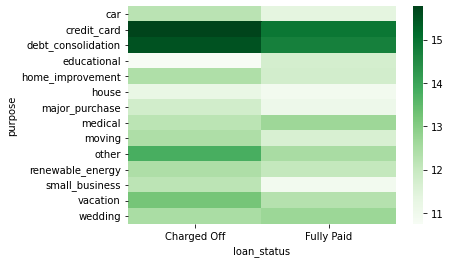

In [18]:
hmp = pd.pivot_table(data=df, index=['purpose'], columns='loan_status', values='dti')
sbn.heatmap(hmp,cmap='Greens')

# This indicates that the more charge-off cases are with the applicants whose loan purpose was "debt consolidation"

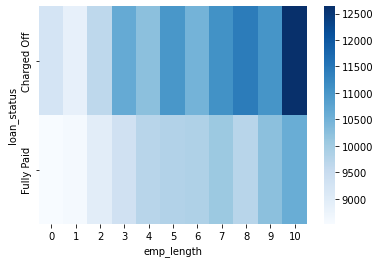

In [19]:
hmp = pd.pivot_table(data=df, index=['loan_status'], columns='emp_length', values='funded_amnt_inv')
sbn.heatmap(hmp,cmap='Blues')

loan_status         Charged Off  Fully Paid
purpose                                    
car                         112         907
credit_card                 384        3116
debt_consolidation         2045       11048
educational                  30         158
home_improvement            232        1493
house                        39         208
major_purchase              143        1275
medical                      74         387
moving                       60         305
other                       401        2159
renewable_energy             13          43
small_business              329         806
vacation                     39         213
wedding                      69         626


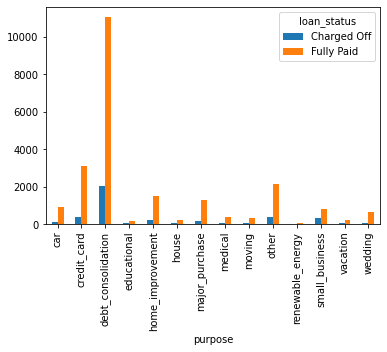

In [21]:
CrosstabResult=pd.crosstab(index=df['purpose'],columns=df['loan_status'])
print(CrosstabResult)
CrosstabResult.plot.bar()

grade           A     B     C     D     E    F   G
loan_status                                       
Charged Off   423  1012   967   786   498  219  65
Fully Paid   6573  7159  4521  2729  1278  388  96


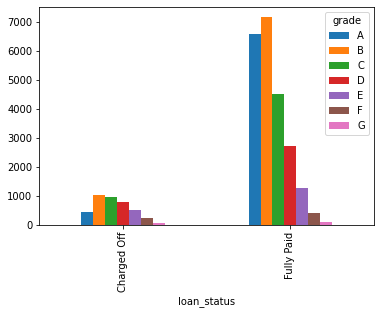

In [22]:
CrosstabResult=pd.crosstab(index=df['loan_status'],columns=df['grade'])
print(CrosstabResult)
CrosstabResult.plot.bar()

# The LC grade does not form part of the default criteria.